# Importing Necessary Libraries

In [1]:
# Libraries for data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Libraries that makes life easier
from pathlib import Path
import opendatasets as od
import cv2 as cv
import os

# Libraries from Scikit-learn
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# Getting the Dataset

In [2]:
if Path(".\\FER-2013").is_file():
    print("The dataset already exists. Skipping download...")
else:
    print("Downloading the datset...")
    od.download("https://www.kaggle.com/datasets/msambare/fer2013/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harianshvashisht
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|█████████████████████████████████████████████████████████████████████████████| 60.3M/60.3M [00:06<00:00, 9.86MB/s]


# Preprocessing and Formatting the Dataset

##### We would be clubbing together the `disgust` and `surprise` emotion directories into a single emotion directory `shock` because of the difference in the numbers of files in those directories

##### Also we would be reducing the number of files in the `train dataset` so that the model doesn't gets baised into predicting a single emotion
##### However, there would be no reduction in the number of files in the `test dataset` only the clubbing of the directories will take place

###### Execute the next line of code if you are accessing this jupyter file for the first time

In [3]:
%run dataset_formatting.py

Dataset formatted successfully!


## Curating a dataset from the FER2013 dataset

#### `Step-1` :- we would be converting the images into sketches so that the features becomes obvious for CNN for feature extraction

In [5]:
arr = np.arange(0,2304,1)
arr = np.append(arr, [7])
arr.shape

(2305,)

In [9]:
def convert_to_sketch(arr):
    states = ['train','test']
    for state in states:
        for emotion in range(0,6):
            emotion_dir = f"./fer2013/{state}/{emotion}"
            for count,file in enumerate(os.listdir(emotion_dir)):
                src = f"{emotion_dir}/{file}"
                img = cv.imread(src)
                gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
                inverted = 255 - gray
                blurred = cv.GaussianBlur(inverted,(21,21),0)
                drawing = cv.divide(gray,255 - blurred, scale=256)
                flat = drawing.flatten()
                flat2 = np.append(flat,[emotion])
                arr = np.vstack((arr,flat2))
    return arr

In [10]:
arr = convert_to_sketch(arr)

In [11]:
arr.shape

(27241, 2305)

In [13]:
new_arr = np.delete(arr,0,axis=0)
new_arr

array([[255, 255, 128, ..., 255, 160,   0],
       [255, 255, 255, ..., 205, 205,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 200, 187,   5],
       [226, 222, 194, ..., 255, 255,   5],
       [255, 255, 255, ..., 184, 102,   5]])

### Visualizing the dataset using t-SNE

In [14]:
x = new_arr[:,:-1]
y = new_arr[:,-1]

In [15]:
len(x),len(y)

(27240, 27240)

In [16]:
tsvd = TruncatedSVD(n_components=50).fit_transform(x)
tsne_res = TSNE(n_components=2, n_jobs = -1, random_state = 42).fit_transform(tsvd)

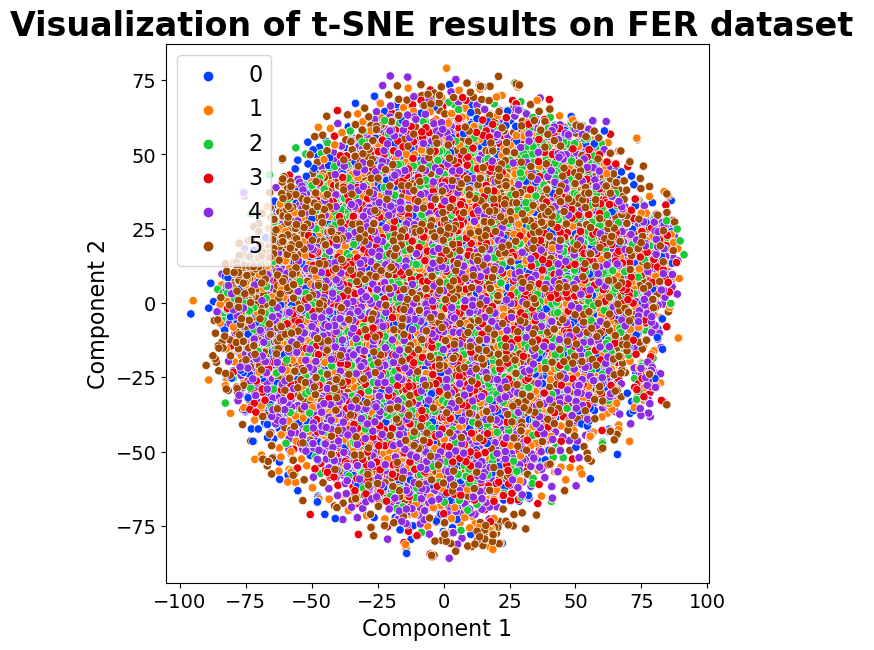

In [17]:
plt.figure(figsize=(7, 7))
plt.title("Visualization of t-SNE results on FER dataset ", fontsize=24, weight='bold')
sns.scatterplot(x=tsne_res[:, 0], y=tsne_res[:, 1], hue=y, palette="bright", legend="full")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Component 1", fontsize=16)
plt.ylabel("Component 2", fontsize=16)
plt.legend(fontsize=16);

### Fitting the emotions into clusters

In [18]:
cluster = ['c1','c2','c3','c4','c5','c6']
emotions = ['angry','fear','happy','neutral','sad','shock']

In [21]:
def making_clusters(x,y,emotion_no):
    emotion_c1 = 0
    emotion_c2 = 0
    emotion_c3 = 0
    emotion_c4 = 0
    emotion_c5 = 0
    emotion_c6 = 0
    emotion_C1 = []
    emotion_C2 = []
    emotion_C3 = []
    emotion_C4 = []
    emotion_C5 = []
    emotion_C6 = []
    for i in range(0,27240):
        if y[i]==emotion_no:
            y1 = tsne_res[i:i+1, 1]
            x1 = tsne_res[i:i+1, 0]
            if ((y1 - (1.7320*x1)) <= 0) and ((y1 >= 0)):
                emotion_c1 = 1 + emotion_c1
                emotion_C1.append(i)
            elif ((y1 - (1.7320*x1))>=0) and ((y1 + (1.7320*x1))>=0):
                emotion_c2 = 1 + emotion_c2
                emotion_C2.append(i)
            elif ((y1 + (1.7320*x1))<=0) and ((y1 >= 0)):
                emotion_c3 = 1 + emotion_c3
                emotion_C3.append(i)
            elif ((y1 - (1.7320*x1)) >= 0) and ((y1 <= 0)):
                emotion_c4 = 1 + emotion_c4
                emotion_C4.append(i)
            elif ((y1 - (1.7320*x1)) <= 0) and ((y1 + (1.7320*x1))<=0):
                emotion_c5 = 1 + emotion_c5
                emotion_C5.append(i)
            elif  ((y1 + (1.7320*x1))>=0) and ((y1 <= 0)):
                emotion_c6 = 1 + emotion_c6
                emotion_C6.append(i)
    emotion_c = [emotion_c1,emotion_c2,emotion_c3,emotion_c4,emotion_c5,emotion_c6]
    emotion_C = [emotion_C1,emotion_C2,emotion_C3,emotion_C4,emotion_C5,emotion_C6]
    
    return emotion_c,emotion_C

In [22]:
angry_c , angry_C = making_clusters(x,y,0)
fear_c , fear_C = making_clusters(x,y,1)
happy_c , happy_C = making_clusters(x,y,2)
neutral_c , neutral_C = making_clusters(x,y,3)
sad_c , sad_C = making_clusters(x,y,4)
shock_c , shock_C = making_clusters(x,y,5)

### Visualizing the clusters obtained

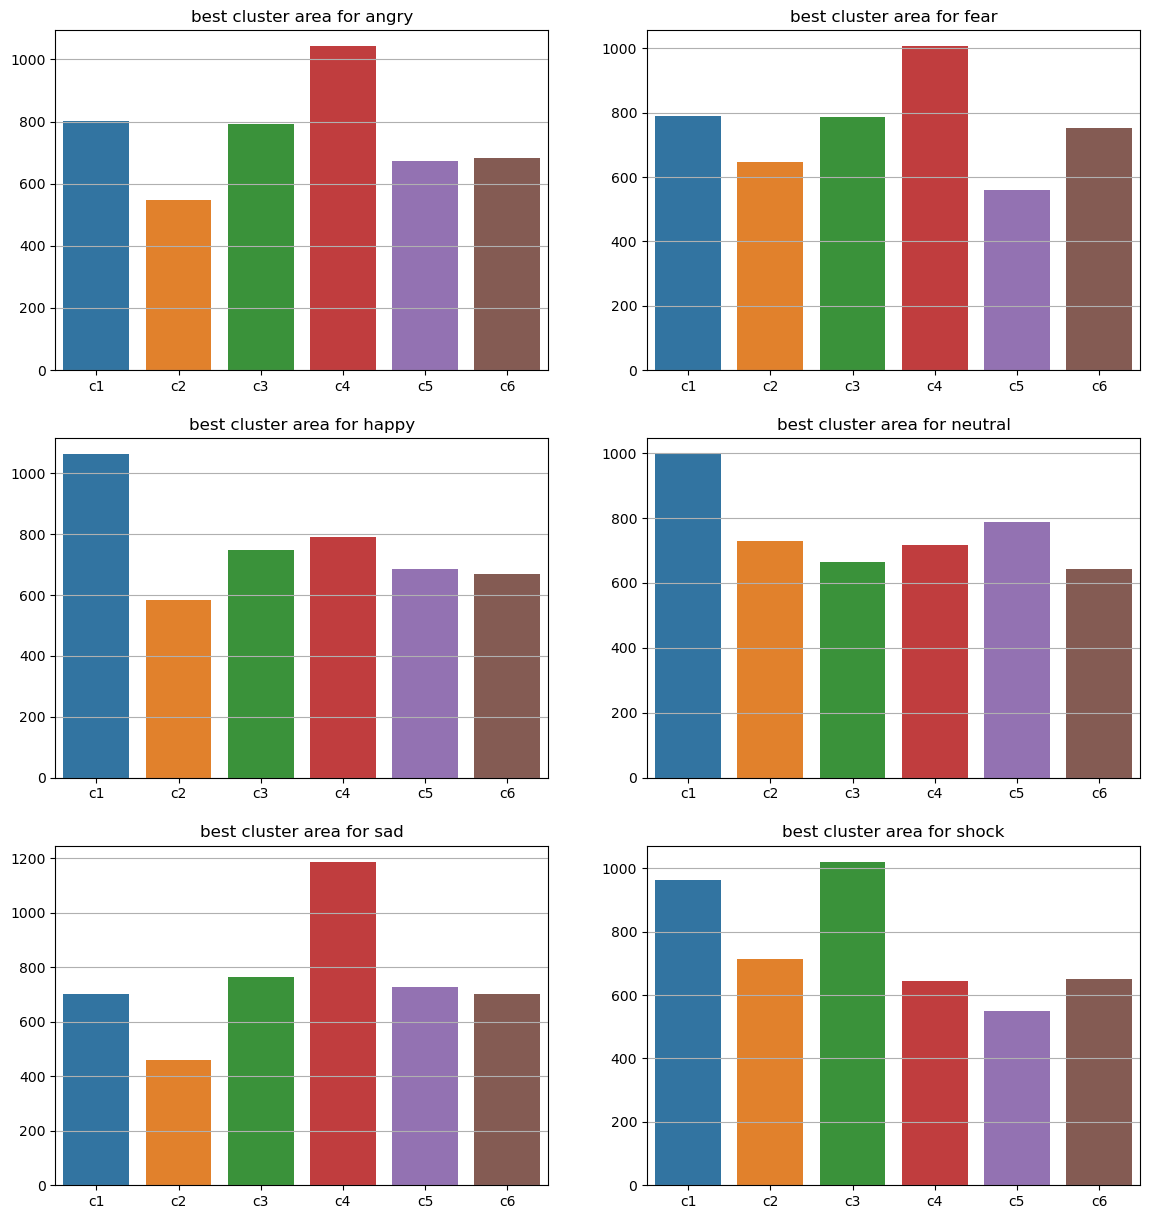

In [23]:
plt.figure(figsize=(14,15))
plt.subplot(321)
plt.grid()
sns.barplot(x=cluster,y=angry_c)
plt.title(label="best cluster area for angry")
plt.subplot(322)
plt.grid()
sns.barplot(x=cluster,y=fear_c)
plt.title(label="best cluster area for fear")
plt.subplot(323)
plt.grid()
sns.barplot(x=cluster,y=happy_c)
plt.title(label="best cluster area for happy")
plt.subplot(324)
plt.grid()
sns.barplot(x=cluster,y=neutral_c)
plt.title(label="best cluster area for neutral")
plt.subplot(325)
plt.grid()
sns.barplot(x=cluster,y=sad_c)
plt.title(label="best cluster area for sad")
plt.subplot(326)
plt.grid()
sns.barplot(x=cluster,y=shock_c)
plt.title(label="best cluster area for shock")
plt.show()

### Creating an array of the most suitable clusters

In [24]:
listd = angry_C[5] + angry_C[1] + angry_C[2] + angry_C[3] + angry_C[4] + fear_C[3] + fear_C[1] + fear_C[2] + fear_C[4] + fear_C[0] + happy_C[0] + happy_C[1] + happy_C[4] + happy_C[2] + happy_C[5] + neutral_C[1] + neutral_C[2] + neutral_C[0] + neutral_C[3] + neutral_C[5] + sad_C[0] + sad_C[1] + sad_C[3] + sad_C[4] + sad_C[5] + shock_C[0] + shock_C[4] + shock_C[2] + shock_C[3] + shock_C[5]
len(listd)

22627

In [25]:
new_arr1 = np.delete(new_arr,listd,axis=0)
new_arr1 , new_arr1.shape

(array([[255, 255, 255, ..., 205, 205,   0],
        [177, 182, 161, ..., 255, 248,   0],
        [185, 165, 164, ..., 255,  79,   0],
        ...,
        [255, 255, 255, ..., 255, 255,   5],
        [209, 161, 128, ..., 255, 255,   5],
        [212, 213, 215, ..., 255, 254,   5]]),
 (4613, 2305))

### Visualizing the newly formatted dataset using t-SNE

In [26]:
X1 = new_arr1[:,:-1]
Y1 = new_arr1[:,-1]

In [27]:
tsvd1 = TruncatedSVD(n_components=50).fit_transform(X1)
tsne_res1 = TSNE(n_components=2, n_jobs = -1, random_state = 42).fit_transform(tsvd1)

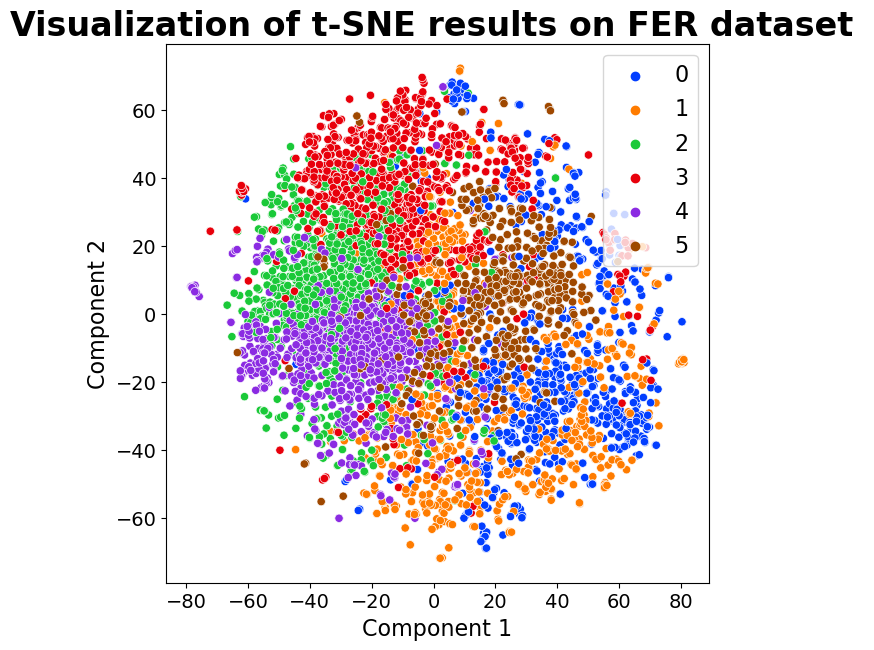

In [28]:
plt.figure(figsize=(7, 7))
plt.title("Visualization of t-SNE results on FER dataset ", fontsize=24, weight='bold')
sns.scatterplot(x=tsne_res1[:, 0], y=tsne_res1[:, 1], hue=Y1, palette="bright", legend="full")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Component 1", fontsize=16)
plt.ylabel("Component 2", fontsize=16)
plt.legend(fontsize=16);

### Creating a DataFrame of the newly formatted data

In [29]:
column = []
for i in range(1,49):
    for j in range(1,49):
        column.append(f"{i}x{j}")

column.append("label")

In [30]:
df = pd.DataFrame(new_arr1, columns =column) 
print("\nPandas DataFrame: ") 
df


Pandas DataFrame: 


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,48x40,48x41,48x42,48x43,48x44,48x45,48x46,48x47,48x48,label
0,255,255,255,156,213,255,255,128,75,167,...,255,255,255,255,255,255,124,205,205,0
1,177,182,161,183,230,255,252,197,150,141,...,255,255,217,251,222,83,107,255,248,0
2,185,165,164,150,110,120,144,135,118,100,...,243,240,248,255,255,255,255,255,79,0
3,255,255,255,255,255,255,255,255,255,255,...,111,147,176,203,251,246,234,188,76,0
4,15,28,56,89,204,255,255,255,255,255,...,255,205,128,192,255,255,192,255,171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,210,157,127,135,155,5
4609,103,160,200,227,243,242,255,255,255,255,...,255,253,253,251,251,250,250,253,254,5
4610,255,255,255,255,255,244,238,240,252,255,...,255,255,255,214,255,255,255,255,255,5
4611,209,161,128,119,149,146,176,201,212,229,...,255,255,255,255,255,255,255,255,255,5


### Saving the curated dataset

In [32]:
df.to_csv('FER_curated_dataset.csv')